<div> 
<img src="יער.jpg" width="600px",length="600px">
</div>

***Presenting by:***

**Netanel Cohen Klas**

**Ariel Cohen**

**Ravid Erez**


**Table of Contents:**


**Performing import and reading of a database**

http://www.authentic-happiness.com/

In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import date
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.ticker as mtick


In [434]:
url = 'https://raw.githubusercontent.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/main/Wellbeing_and_lifestyle_data_Kaggle.csv'
life_df = pd.read_csv(url)

In [435]:
len(life_df)

15972

In [428]:
life_df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [429]:
life_df.shape

(15972, 24)

In [430]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [431]:
life_df.describe(include = 'object')

,Timestamp,DAILY_STRESS,AGE,GENDER
count,15972,15972,15972,15972
unique,7002,7,4,2
top,7/23/18,3,21 to 35,Female
freq,162,4398,6108,9858


In [22]:
life_df[['AGE']].value_counts()

AGE         
21 to 35        6108
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: count, dtype: int64

In [23]:
life_df[['GENDER']].value_counts()

GENDER
Female    9858
Male      6114
Name: count, dtype: int64

In [25]:
life_df.groupby(['AGE'])[['DONATION']].sum()\
                                     .reset_index()\
                                     .sort_values(by='DONATION',ascending=False)

,AGE,DONATION
0,21 to 35,14492
1,36 to 50,13681
2,51 or more,11368
3,Less than 20,3828


In [26]:
life_df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [27]:
life_df.isnull().sum().sort_values(ascending=True)

Timestamp                  0
AGE                        0
WEEKLY_MEDITATION          0
TIME_FOR_PASSION           0
PERSONAL_AWARDS            0
SUFFICIENT_INCOME          0
DAILY_SHOUTING             0
LOST_VACATION              0
SLEEP_HOURS                0
LIVE_VISION                0
DAILY_STEPS                0
FLOW                       0
TODO_COMPLETED             0
BMI_RANGE                  0
DONATION                   0
ACHIEVEMENT                0
SOCIAL_NETWORK             0
SUPPORTING_OTHERS          0
CORE_CIRCLE                0
PLACES_VISITED             0
DAILY_STRESS               0
FRUITS_VEGGIES             0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [82]:
def plot_correlation_heatmap(df, columns, method):
    correlation_data = df[columns].dropna()
    correlation_matrix = correlation_data.corr(method=method)
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap ({method.capitalize()} Method)')
    plt.show()

<Axes: >

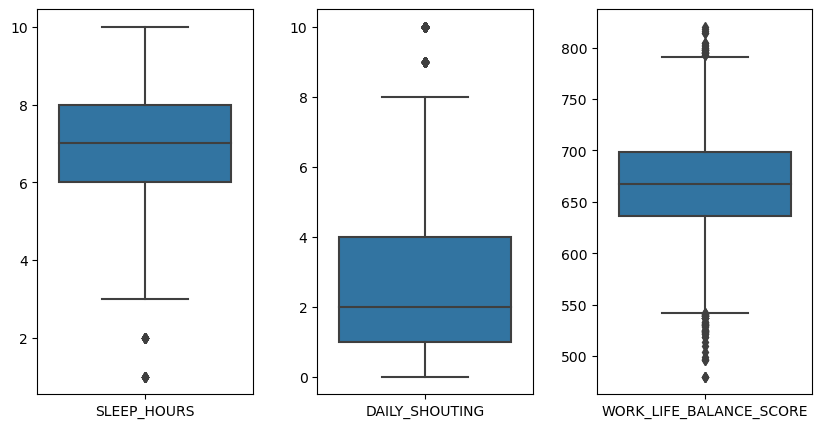

In [83]:
fig, ax = plt.subplots (figsize=(10, 5),  ncols=3)
plt.subplots_adjust(wspace = 0.3)
sns.boxplot(data = life_df[['SLEEP_HOURS']], ax = ax[0])
sns.boxplot(data = life_df[['DAILY_SHOUTING']], ax = ax[1])
sns.boxplot(data = life_df[['WORK_LIFE_BALANCE_SCORE']], ax = ax[2])

בהתבסס על הנתונים שהצגנו בגרף, ניתן להסיק את המסקנות הבאות לגבי הקשר בין חריגות בשעות השינה לבין העמודות השונות:
מסקנות מהנתונים:
DAILY_SHOUTING:
אנשים עם שעות שינה חריגות נוטים לדווח על רמות יומיות גבוהות יותר של צעקות או ריב עם אחרים לעומת אנשים עם שעות שינה רגילות הדבר יכול להעיד על כך ששעות שינה לא סדירות או לא מספקות עשויות לגרום לרמות מתח או כעס גבוהות יותר ביום יום.
ACHIEVEMENT:
אנשים עם שעות שינה רגילות נוטים לדווח על הישגים גבוהים יותר לעומת אנשים עם שעות שינה חריגות. הדבר עשוי לרמז על כך ששעות שינה סדירות ומספקות תורמות לרמת הישגים גבוהה יותר, אולי עקב ריכוז טוב יותר ויכולת תפקוד משופרת במהלך היום.
TODO_COMPLETED:
אנשים עם שעות שינה רגילות מדווחים על השלמת יותר משימות יומיות לעומת אנשים עם שעות שינה חריגות. הדבר יכול להצביע על כך ששינה מספקת משפרת את היכולת לנהל זמן ולהשלים משימות בצורה יעילה יותר.
TIME_FOR_PASSION:
אנשים עם שעות שינה רגילות נוטים להקדיש יותר זמן לפעילויות שהם אוהבים לעומת אנשים עם שעות שינה חריגות. זה עשוי לרמז על כך ששעות שינה מספקות מאפשרות לאנשים להקדיש זמן לתשוקות ולתחביבים שלהם, מה שמשפר את רמת שביעות הרצון והאיזון בחיים.
סיכום:
הנתונים מראים כי חריגות בשעות השינה עשויות להשפיע לרעה על היבטים שונים של החיים, כולל רמות מתח, הישגים, ניהול זמן והקדשת זמן לתחביבים. שמירה על שעות שינה סדירות ומספקות עשויה לתרום לרמת תפקוד גבוהה יותר ולשיפור הרווחה הכללית.


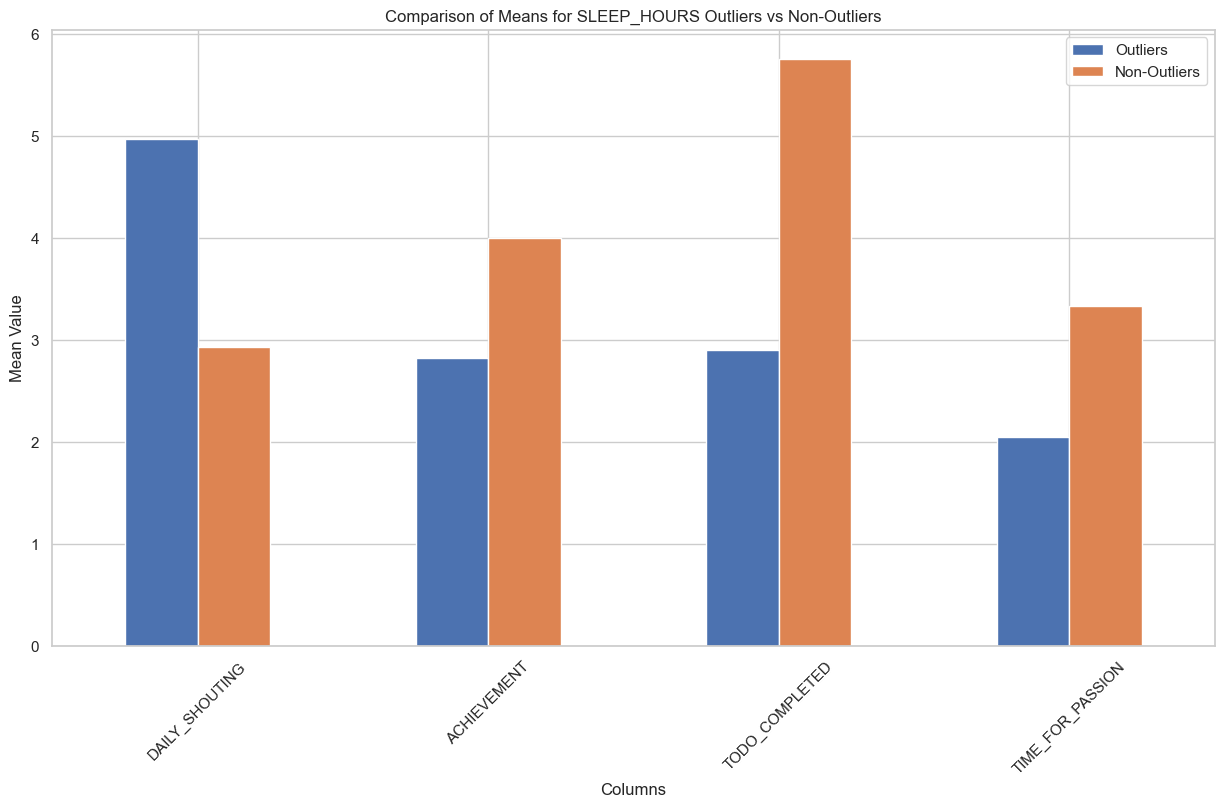

In [363]:

def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers
columns_to_exclude = ['AGE', 'DATE', 'DAILY_STRESS', 'GENDER']
columns_to_include = ['DAILY_SHOUTING','ACHIEVEMENT', 'TODO_COMPLETED', 'TIME_FOR_PASSION']
outliers_sleep_hours = find_outliers(life_df, 'SLEEP_HOURS')
life_df['SLEEP_HOURS_OUTLIER'] = life_df.index.isin(outliers_sleep_hours.index)
mean_outliers = life_df[life_df['SLEEP_HOURS_OUTLIER']][columns_to_include].mean()
mean_non_outliers = life_df[~life_df['SLEEP_HOURS_OUTLIER']][columns_to_include].mean()
comparison_df = pd.DataFrame({'Outliers': mean_outliers, 'Non-Outliers': mean_non_outliers})
comparison_df.plot(kind='bar', figsize=(15, 8))
plt.title('Comparison of Means for SLEEP_HOURS Outliers vs Non-Outliers')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()


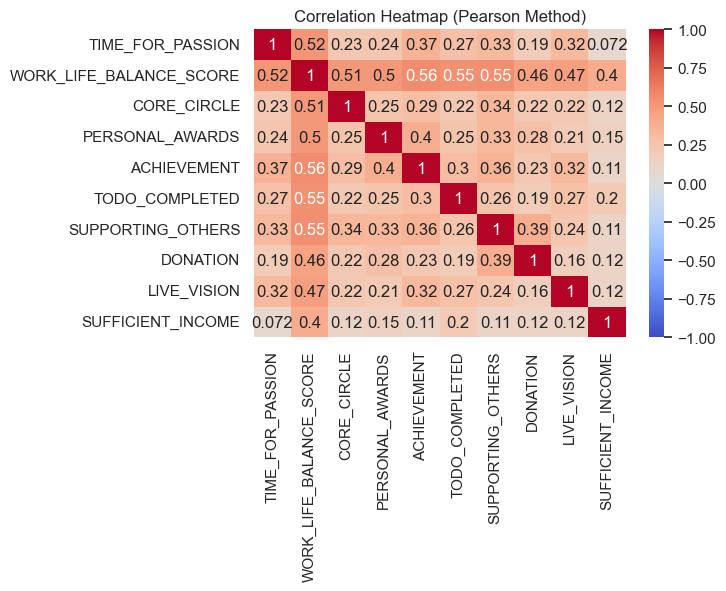

In [365]:
plot_correlation_heatmap(life_df, ["TIME_FOR_PASSION","WORK_LIFE_BALANCE_SCORE","CORE_CIRCLE","PERSONAL_AWARDS","ACHIEVEMENT","TODO_COMPLETED","SUPPORTING_OTHERS","DONATION","LIVE_VISION","SUFFICIENT_INCOME"],"pearson")

In [ ]:
התחלנו לבדוק קורלציות בין ציון איזון חיים לעבודה לבין שלושה זוגות של עמודות שעל כל זוג נבחן השפעה של אותם קטגוריות על ציון איזון חיים עבודה.ניתן לראות בקורלציה כי ישנו קשר משמעותי בין הציון לעמודות אלו 

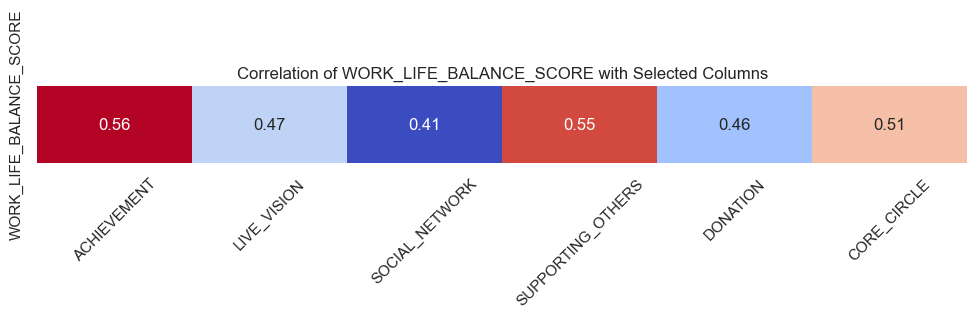

In [399]:

columns_to_correlate = ['ACHIEVEMENT', 'LIVE_VISION', 'SOCIAL_NETWORK', 'SUPPORTING_OTHERS', 'DONATION', 'CORE_CIRCLE']
correlation_matrix = life_df[['WORK_LIFE_BALANCE_SCORE'] + columns_to_correlate].corr()
wlb_corr = correlation_matrix.loc['WORK_LIFE_BALANCE_SCORE', columns_to_correlate]
plt.figure(figsize=(12, 1))
sns.heatmap(wlb_corr.to_frame().T, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.xticks(rotation=45)
plt.title('Correlation of WORK_LIFE_BALANCE_SCORE with Selected Columns')
plt.show()


In [ ]:
בחרנו להתמקד בקשר בין תמיכה באחרים ואינטראקציה עם אנשים לבין איזון חיים עבודה ואנו רואים שככל שהאדם יש לו יותר אינטראקציה חברתית עם אנשים ויותר תומך באנשים אחרים האיזון שלו בין חיים לעבודה הוא יותר בריא וזה בא לידי ביטןי בציון של איזון בין חיים לעבודה  

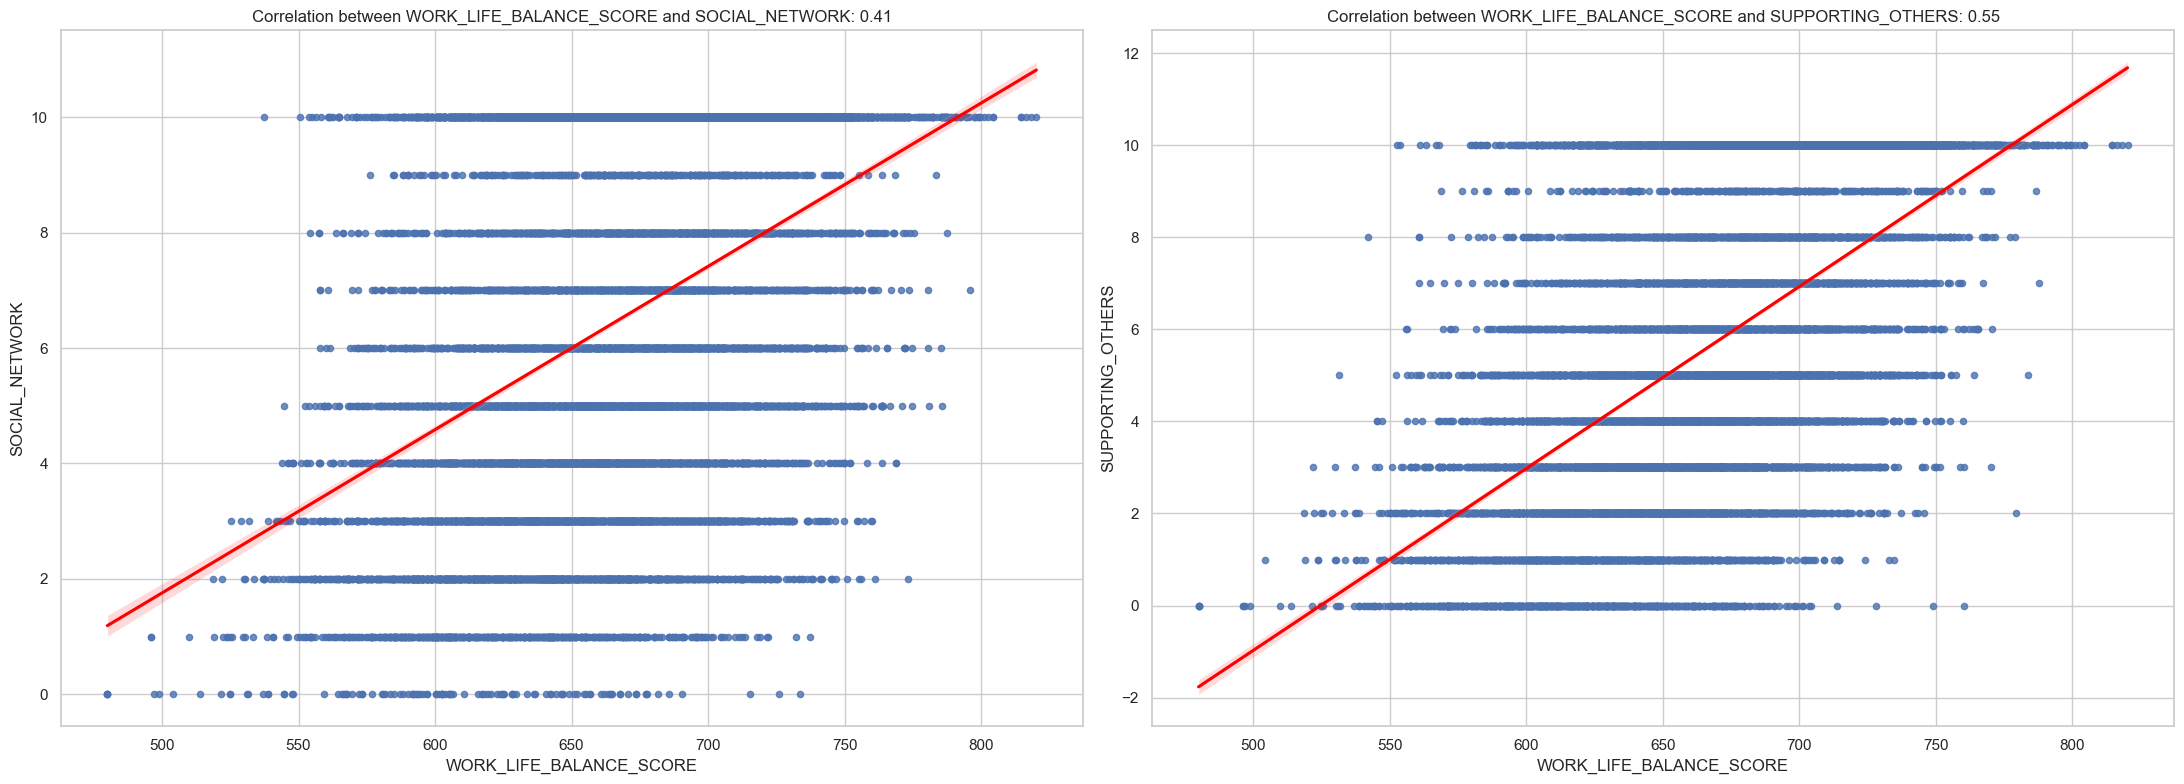

In [388]:

columns_to_correlate = ['SOCIAL_NETWORK', 'SUPPORTING_OTHERS']
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
axes = axes.flatten()
for i, col in enumerate(columns_to_correlate):
    correlation = life_df[['WORK_LIFE_BALANCE_SCORE', col]].corr().iloc[0, 1]
    sns.regplot(x='WORK_LIFE_BALANCE_SCORE', y=col, data=life_df, scatter_kws={'s':20}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'Correlation between WORK_LIFE_BALANCE_SCORE and {col}: {correlation:.2f}')
    axes[i].set_xlabel('WORK_LIFE_BALANCE_SCORE')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()


In [ ]:
לאחר מציאת הקשר בין תמיכה באחרים,אינטראקציה חברתית לבין איזון בין חיים לעבודה נצלול פנימה ונבדוק את הקשר בין עמודות אלו לבין הגיל והמגדר .ניתן לראות בראייה ראשונית כי יש נטיה לנשים לקיים אינטראקציה ברמה יותר גבוהה מגברים נמשיך להסביר זאת על ידי גרפים  

In [538]:
life = life_df.groupby(['AGE','GENDER'])[['SOCIAL_NETWORK','SUPPORTING_OTHERS']].mean() .reset_index() 
life

,AGE,GENDER,SOCIAL_NETWORK,SUPPORTING_OTHERS
0,21 to 35,Female,6.360350,5.477266
1,21 to 35,Male,5.913128,4.631087
2,36 to 50,Female,6.841270,6.315772
3,36 to 50,Male,6.629280,5.609209
4,51 or more,Female,6.125273,6.655609
5,51 or more,Male,6.191083,5.896269
6,Less than 20,Female,7.504225,5.003756
7,Less than 20,Male,7.148541,4.194960


In [ ]:
התחלנו לבדוק כל ערך בעמודה על מנת לראות פילוח כמה מכל מגדר נמצאים בכל קטגוריה של העמודה וראינו שיש נטייה לנשים לקיים אינטראקציה חברתית גבוהה יותר גם ביחס לחלקם במדגם .נראה זאת בעזרת גרפי עוגה   

In [542]:
distribution_by_gender = life_df.groupby('GENDER')['SOCIAL_NETWORK'].value_counts().unstack().fillna(0)
print(distribution_by_gender)

SOCIAL_NETWORK  0    1    2    3    4     5    6    7    8    9     10
GENDER                                                                
Female          55  312  738  991  934  1134  758  608  621  205  3502
Male            61  244  503  602  626   778  461  364  390  131  1954


In [ ]:
גרפי העוגה מייצגים ערכים מסויימים בעמודה שבהם אחוז הגברים יותר גבוה ביחס לחלקם במדגם.ניתן לראות כי במקרים בהם אנשים מקיימים מעט אינטראקציות ההבדלים בין המגדרים מצטמצמים ביחס לחלקם באוכלוסייה ולעומת זאת במקרים בהם אנשים מקיימים ריבוי אינטראקציות ההבדלים בין הנשים לגברים גדלים ביחס לחלקם באוכלוסייה. 

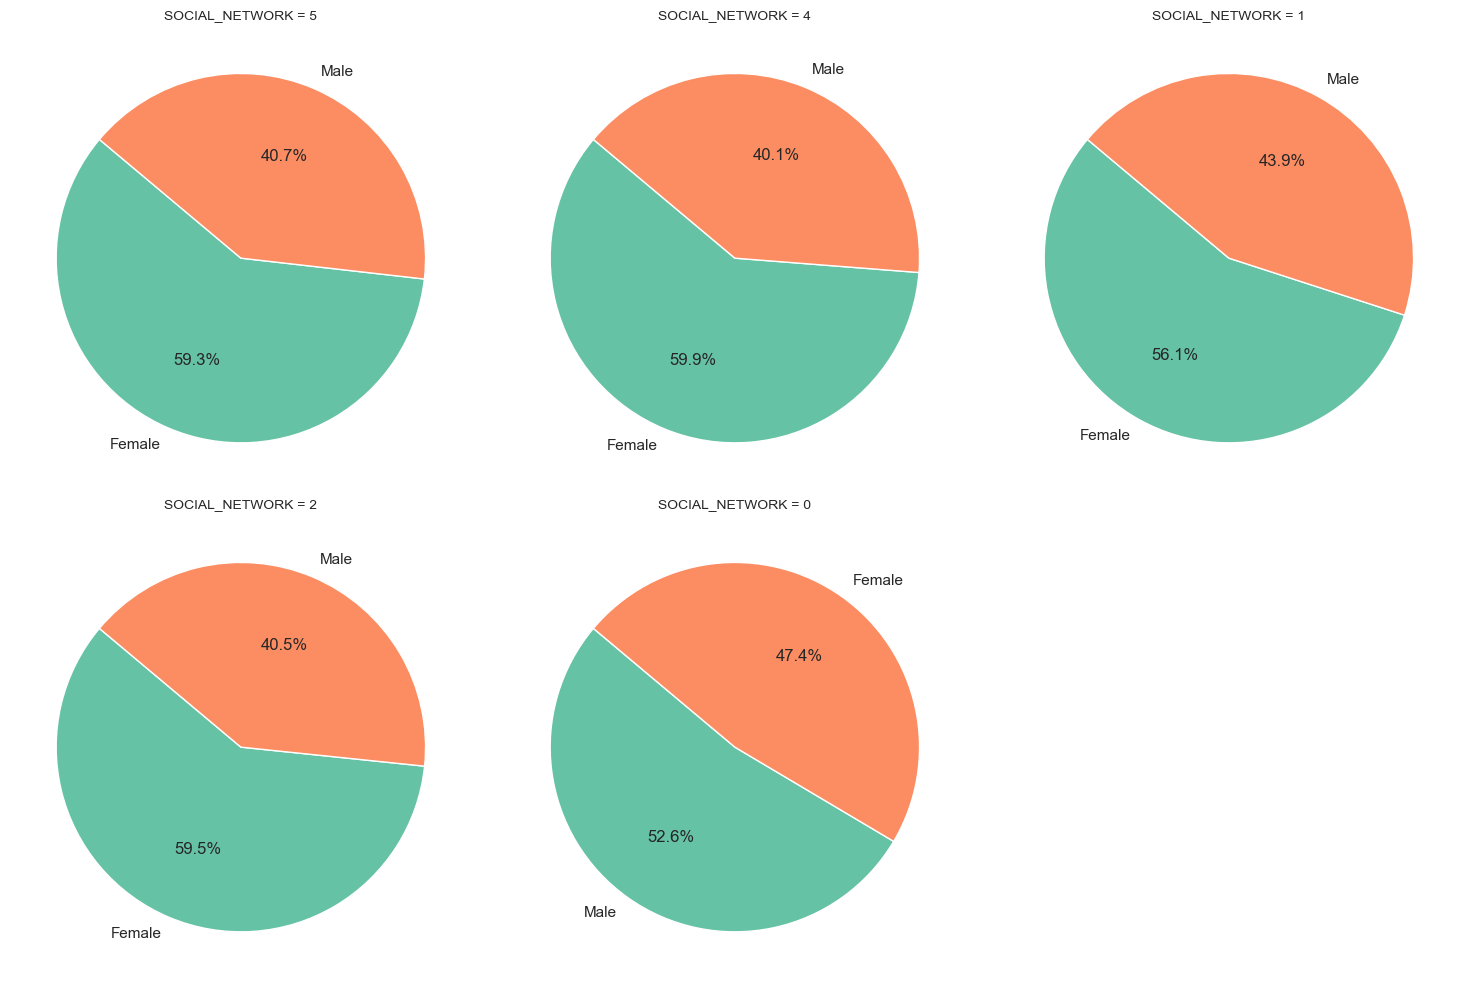

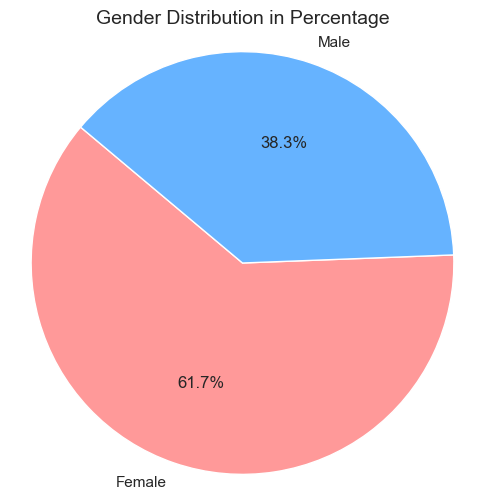

In [567]:
social_network_values = life_df['SOCIAL_NETWORK'].unique()
filtered_values = []
for value in social_network_values:
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100
    if gender_distribution.get('Male', 0) > 40:
        filtered_values.append(value)
num_cols = 3
num_rows = (len(filtered_values) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()
small_colors = ['#66c2a5', '#fc8d62']
for ax, value in zip(axes, filtered_values):
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100   
    ax.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=small_colors)
    ax.set_title(f'SOCIAL_NETWORK = {value}', fontsize=10)
for ax in axes[len(filtered_values):]:
    ax.axis('off')

plt.tight_layout()
plt.show()
gender_distribution = life_df['GENDER'].value_counts(normalize=True) * 100
large_colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=large_colors)
plt.title('Gender Distribution in Percentage', fontsize=14)
plt.axis('equal')  
plt.show()


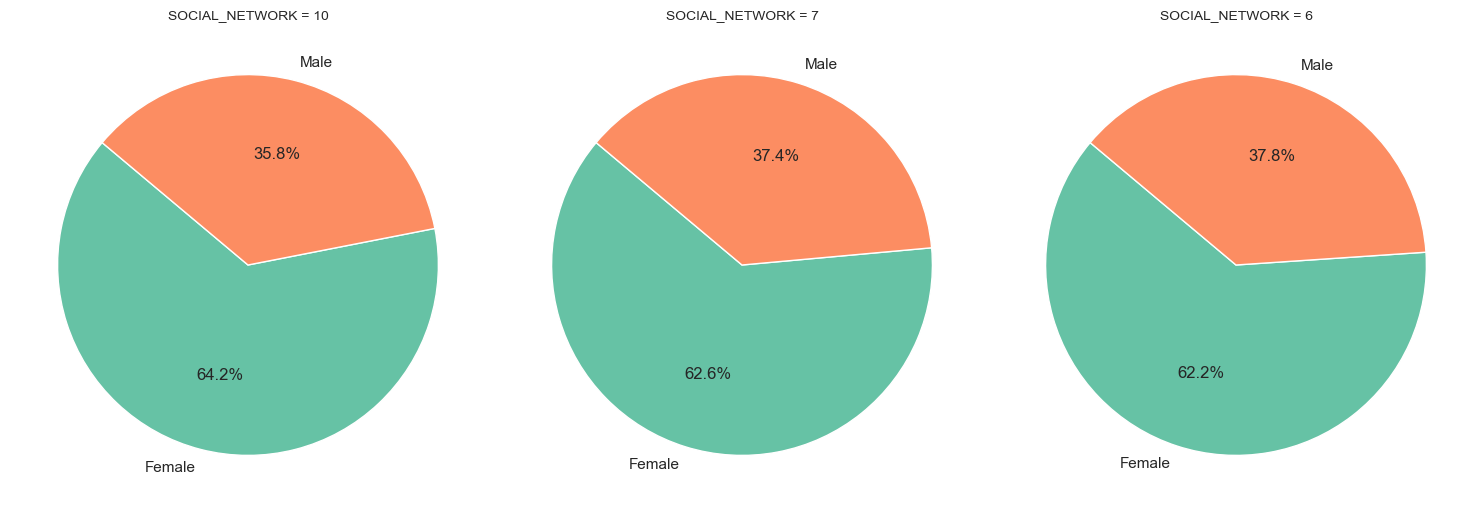

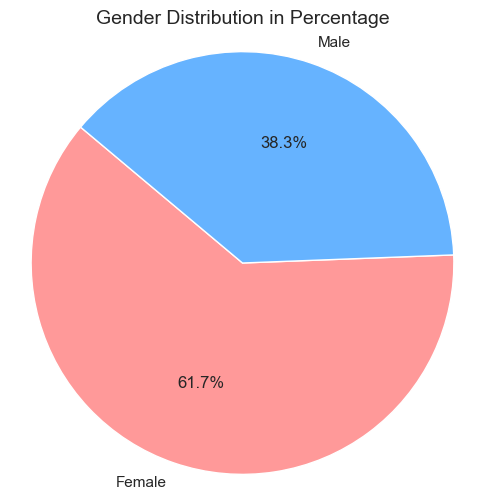

In [571]:
social_network_values = life_df['SOCIAL_NETWORK'].unique()
filtered_values = []
for value in social_network_values:
    if value in [3, 8, 9]:
        continue
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100
    if gender_distribution.get('Male', 0) < 40:
        filtered_values.append(value)
num_cols = 3
num_rows = (len(filtered_values) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()
small_colors = ['#66c2a5', '#fc8d62']
for ax, value in zip(axes, filtered_values):
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100
    
    ax.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=small_colors)
    ax.set_title(f'SOCIAL_NETWORK = {value}', fontsize=10)

# הסרת צירים ריקים
for ax in axes[len(filtered_values):]:
    ax.axis('off')

plt.tight_layout()
plt.show()
gender_distribution = life_df['GENDER'].value_counts(normalize=True) * 100
large_colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=large_colors)
plt.title('Gender Distribution in Percentage', fontsize=14)
plt.axis('equal')  # שמירה על יחס עיגול
plt.show()


In [ ]:
נשים נוטות לקיים יותר אינטראקציות יומיות מגברים, מה שמוביל לאיזון טוב יותר בין עבודה לחיים הפרטיים. אינטראקציות יומיות רבות מסייעות ביצירת רשתות חברתיות תומכות, המהוות גורם מרכזי באיזון בין עבודה לחיים. תמיכה באחרים מהווה מרכיב משמעותי שמשפר את תחושת הסיפוק והאיזון הכללי בין עבודה לחיים. שני הגורמים הללו יחדיו מסייעים לנשים לחוות איזון טוב יותר בין עבודה לחיים בהשוואה לגברים.

In [ ]:
גרף הפיזור מראה שאנשים שתורמים יותר הם אלו שמדווחים על איזון טוב יותר בין עבודה לחיים. קו המגמה החיובי מצביע על כך שיש קשר חיובי בין הנתינה לבין ציון האיזון בין עבודה לחיים. הנתינה עשויה להוות מקור לסיפוק אישי ולתחושת משמעות, המובילים לרווחה כללית טובה יותר בנוסף גרף הפיזור מראה שאנשים עם יותר חברים קרובים מדווחים על איזון טוב יותר בין עבודה לחיים. קו המגמה החיובי מצביע על כך שיש קשר חיובי בין מספר החברים הקרובים לבין ציון האיזון בין עבודה לחיים. תמיכה חברתית ממעגל חברים קרוב עשויה לספק משאבים רגשיים ולהקל על לחצים, מה שמוביל לאיזון טוב יותר בחיים. 

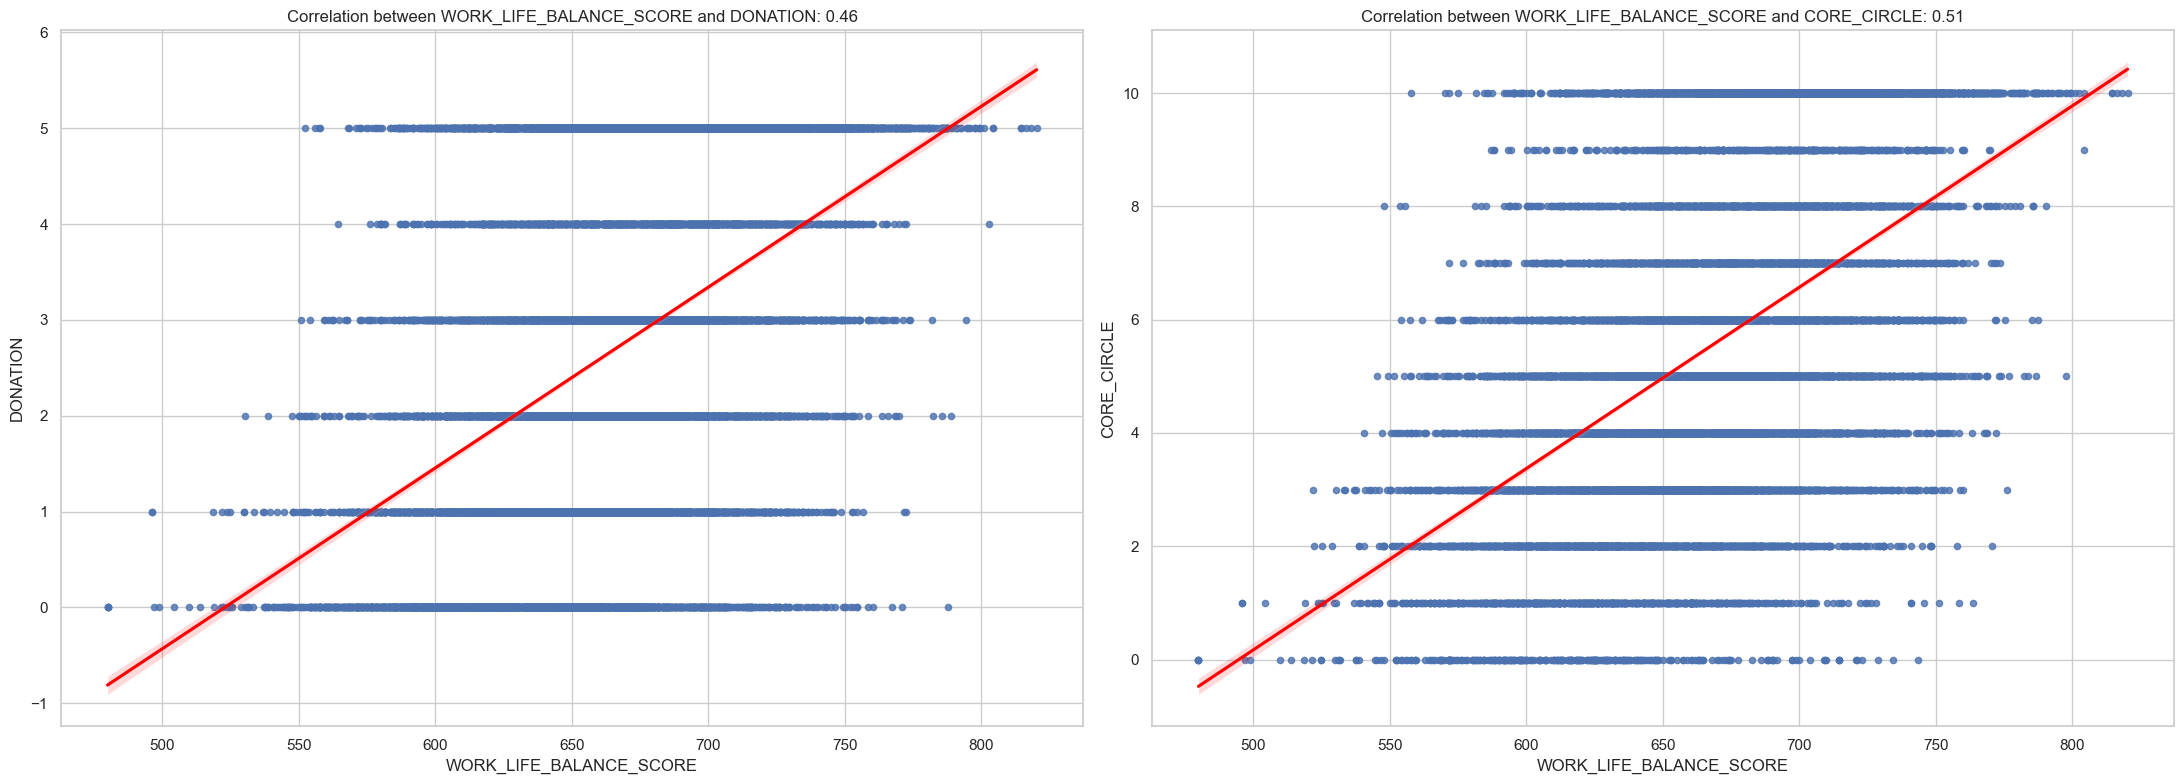

In [389]:

columns_to_correlate = ['DONATION', 'CORE_CIRCLE']
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
axes = axes.flatten()
for i, col in enumerate(columns_to_correlate):
    correlation = life_df[['WORK_LIFE_BALANCE_SCORE', col]].corr().iloc[0, 1]
    sns.regplot(x='WORK_LIFE_BALANCE_SCORE', y=col, data=life_df, scatter_kws={'s':20}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'Correlation between WORK_LIFE_BALANCE_SCORE and {col}: {correlation:.2f}')
    axes[i].set_xlabel('WORK_LIFE_BALANCE_SCORE')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()



In [572]:
life_df.groupby(['DONATION'])[['TIME_FOR_PASSION']].sum()\
                                                 .reset_index()\
                                                 .sort_values(by="TIME_FOR_PASSION")

,DONATION,TIME_FOR_PASSION
4,4,5024
0,0,6098
1,1,7525
3,3,7772
2,2,8214
5,5,18499


In [ ]:
מנסה לקשר בין חריגים של נתינה לזמן לעצמך

In [ ]:
plt.figure(figsize=(2,5))
g = sns.boxplot(data = life_df[['DONATION']])

KeyError: "None of [Index(['CORE_CIRCLE'], dtype='object')] are in the [columns]"

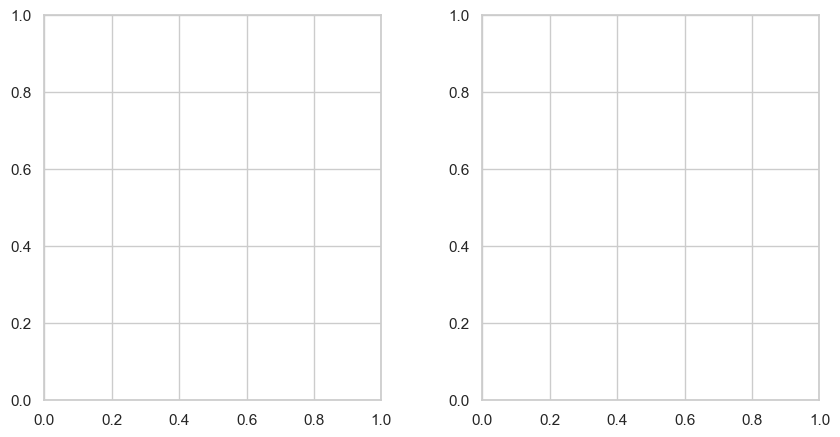

In [584]:
fig, ax = plt.subplots (figsize=(10, 5),  ncols=2)
plt.subplots_adjust(wspace = 0.3)
sns.boxplot(data = life_df[['CORE_CIRCLE']], ax = ax[0])
sns.boxplot(data = life_df[['DONATION']], ax = ax[1])


In [ ]:
גרף הפיזור מראה את הקשר בין הישגים לאיזון עבודה-חיים. אם יש קו מגמה עולה, זה מצביע על כך שיש קשר חיובי בין המשתנים. אנשים שמגיעים להישגים גבוהים יותר נוטים לדווח על איזון טוב יותר בין עבודה לחיים בנוסף גרף הפיזור מראה את הקשר בין חזון חיים לאיזון עבודה-חיים. אם יש קו מגמה עולה, זה מצביע על כך שיש קשר חיובי בין המשתנים. אנשים עם חזון חיים ברור נוטים לדווח על איזון טוב יותר בין עבודה לחיים..

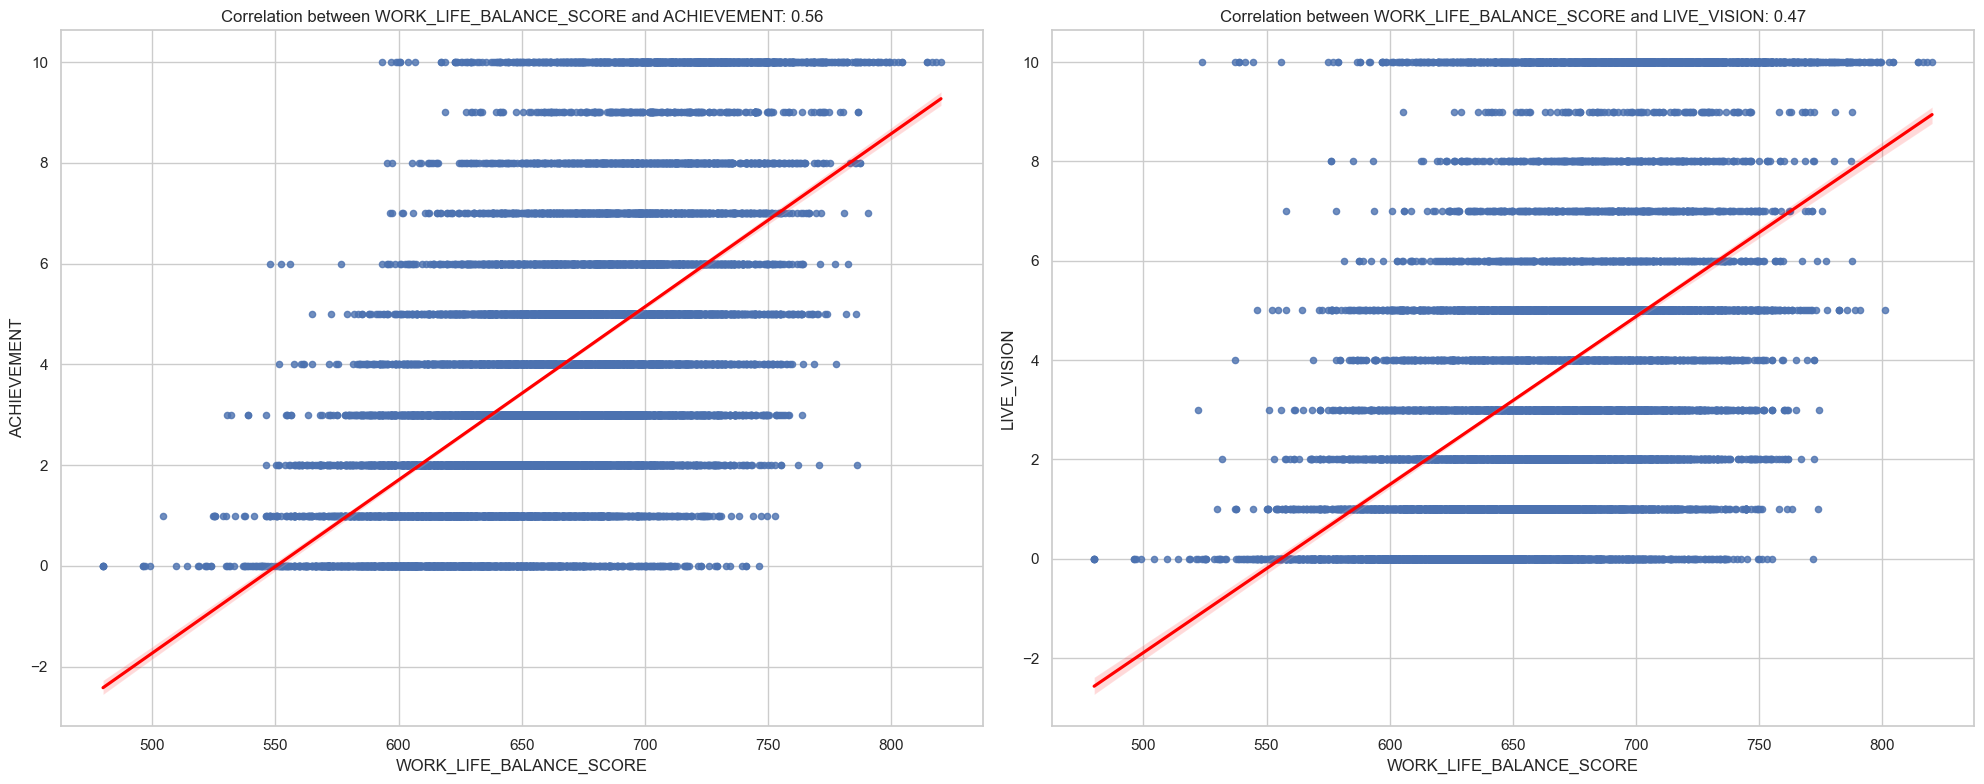

In [390]:

columns_to_correlate = ['ACHIEVEMENT', 'LIVE_VISION']
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes = axes.flatten()
for i, col in enumerate(columns_to_correlate):
    correlation = life_df[['WORK_LIFE_BALANCE_SCORE', col]].corr().iloc[0, 1]
    sns.regplot(x='WORK_LIFE_BALANCE_SCORE', y=col, data=life_df, scatter_kws={'s':20}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'Correlation between WORK_LIFE_BALANCE_SCORE and {col}: {correlation:.2f}')
    axes[i].set_xlabel('WORK_LIFE_BALANCE_SCORE')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()


In [517]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


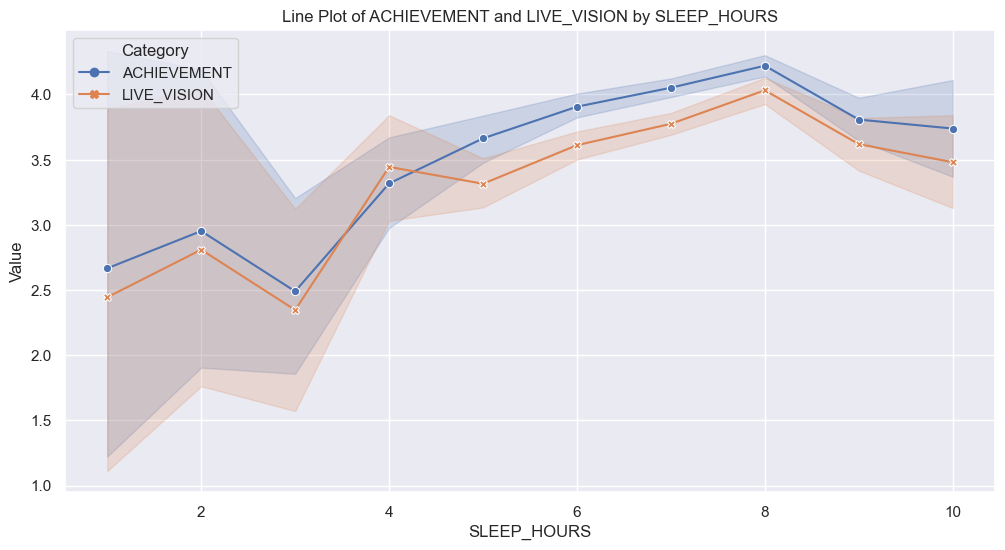

In [519]:
life_df_melted = life_df.melt(id_vars=['SLEEP_HOURS'], value_vars=['ACHIEVEMENT', 'LIVE_VISION'], var_name='Category', value_name='Value')
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="SLEEP_HOURS", y="Value", hue="Category", style="Category", markers=True, dashes=False, data=life_df_melted)
plt.title('Line Plot of ACHIEVEMENT and LIVE_VISION by SLEEP_HOURS')
plt.xlabel('SLEEP_HOURS')
plt.ylabel('Value')
plt.show()


In [514]:
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION','WORK_LIFE_BALANCE_SCORE']].mean()

TIME_FOR_PASSION  WORK_LIFE_BALANCE_SCORE
AGE          GENDER                                           
21 to 35     Female          3.322508               662.017509
             Male            3.308142               659.772341
36 to 50     Female          3.209726               669.008342
             Male            3.257969               664.180224
51 or more   Female          3.421650               678.510127
             Male            3.573248               676.048863
Less than 20 Female          3.127700               664.009577
             Male            3.653846               664.251724

In [433]:
life_df['AGE'] = life_df['AGE'].map({'Less than 20':'0 to 20','21 to 35':'21 to 35', '36 to 50':'36 to 50', '51 or more' : '51 or more'})

In [419]:
features = ['TIME_FOR_PASSION',"CORE_CIRCLE","SUPPORTING_OTHERS",'SOCIAL_NETWORK',"DONATION"]
small_fit = pd.get_dummies(life_df[features])
small_fit

,TIME_FOR_PASSION,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,DONATION
0,0,5,0,5,0
1,2,3,8,10,2
2,8,4,4,10,2
3,2,3,10,7,5
4,1,3,10,4,4
...,...,...,...,...,...
15967,2,4,0,10,4
15968,5,8,7,4,3
15969,1,10,10,8,5
15970,6,8,2,7,2


**מסקנה ראשונה

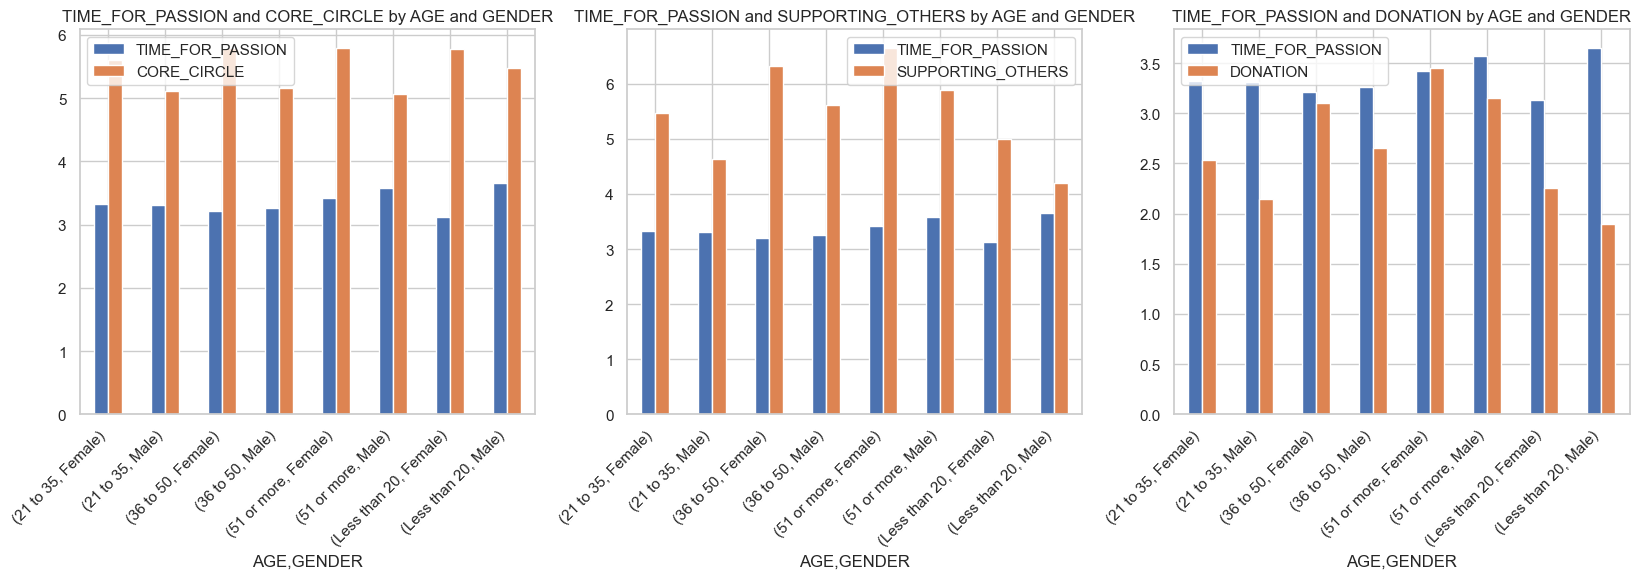

In [337]:
fig, axes= plt.subplots(figsize=(20,5), ncols = 3)
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"CORE_CIRCLE"]].mean().plot.bar(ax =axes[0])
axes[0].set_title('TIME_FOR_PASSION and CORE_CIRCLE by AGE and GENDER')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"SUPPORTING_OTHERS"]].mean().plot.bar(ax =axes[1])
axes[1].set_title('TIME_FOR_PASSION and SUPPORTING_OTHERS by AGE and GENDER')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"DONATION"]].mean().plot.bar(ax =axes[2])
axes[2].set_title('TIME_FOR_PASSION and DONATION by AGE and GENDER')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
plt.show()

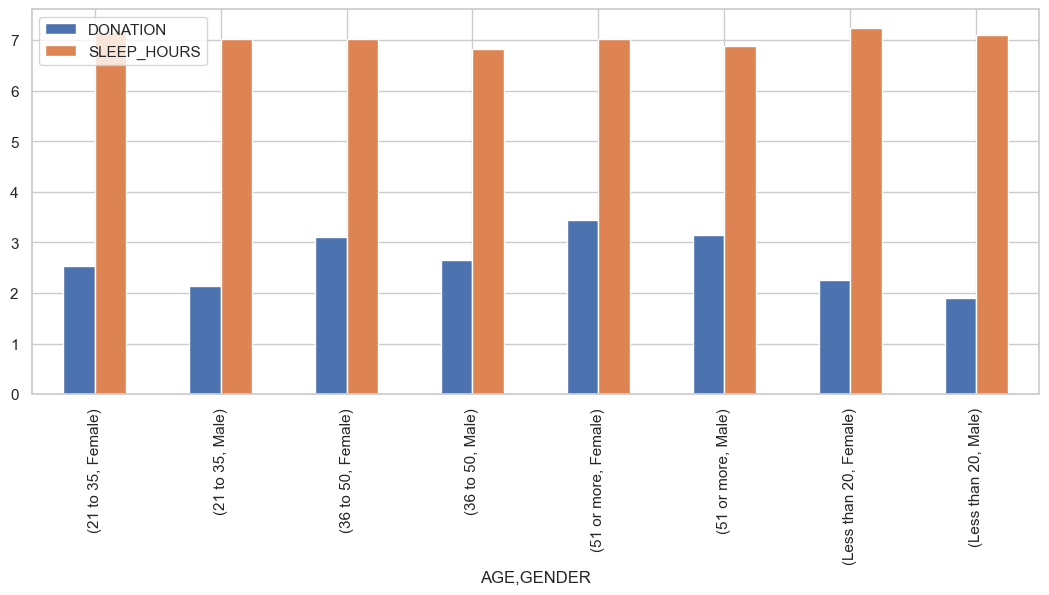

In [355]:
life_df.groupby(['AGE','GENDER'])[['DONATION',"SLEEP_HOURS"]].mean().plot.bar(figsize=(13,5))
plt.show()

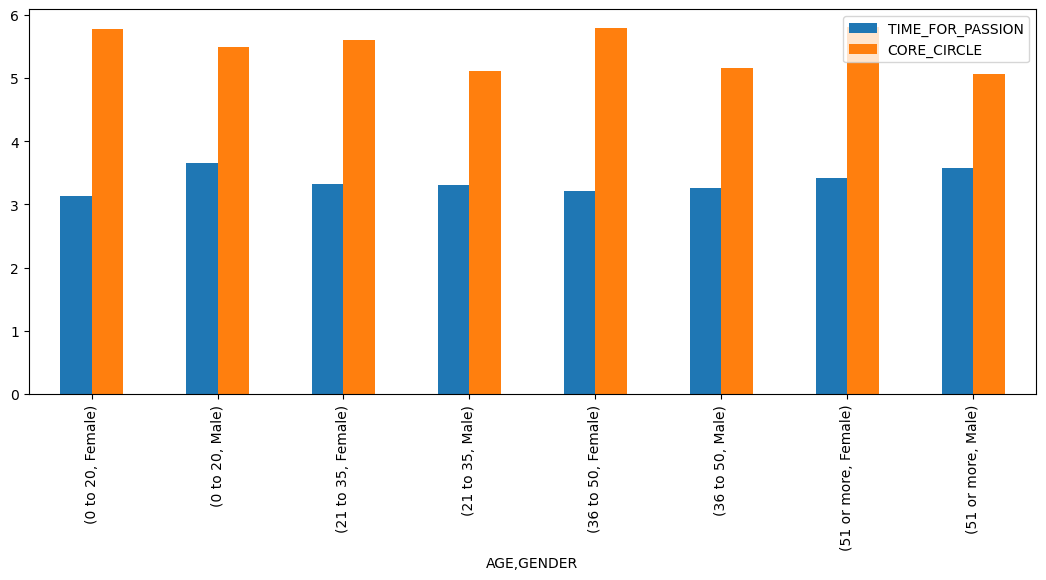

In [162]:
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"CORE_CIRCLE"]].mean().plot.bar(figsize=(13,5))
plt.show()

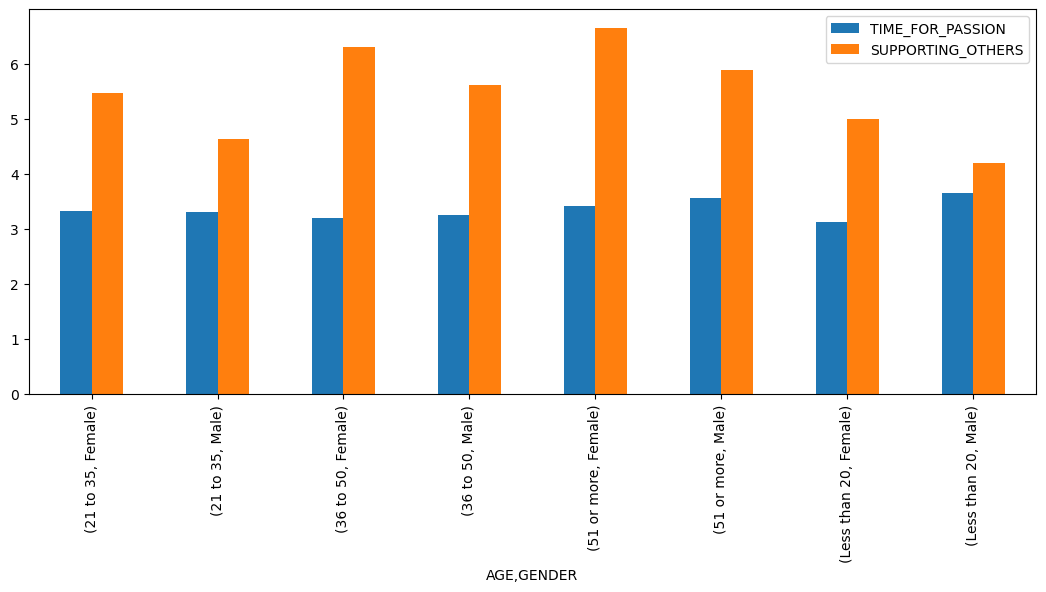

In [119]:
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"SUPPORTING_OTHERS"]].mean().plot.bar(figsize=(13,5))
plt.show()

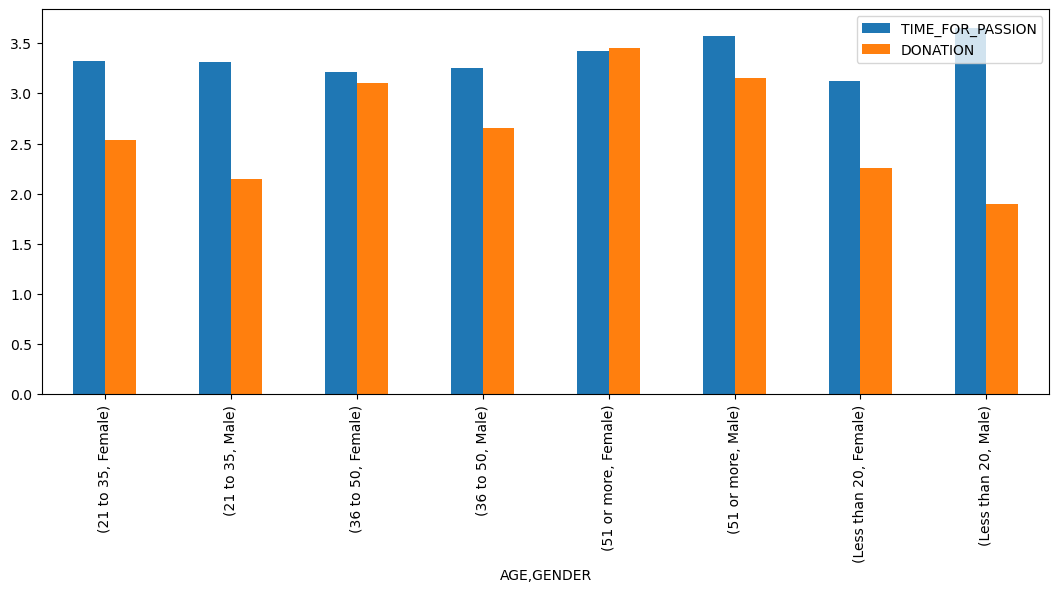

In [124]:
life_df.groupby(['AGE','GENDER'])[['TIME_FOR_PASSION',"DONATION"]].mean().plot.bar(figsize=(13,5))
plt.show()

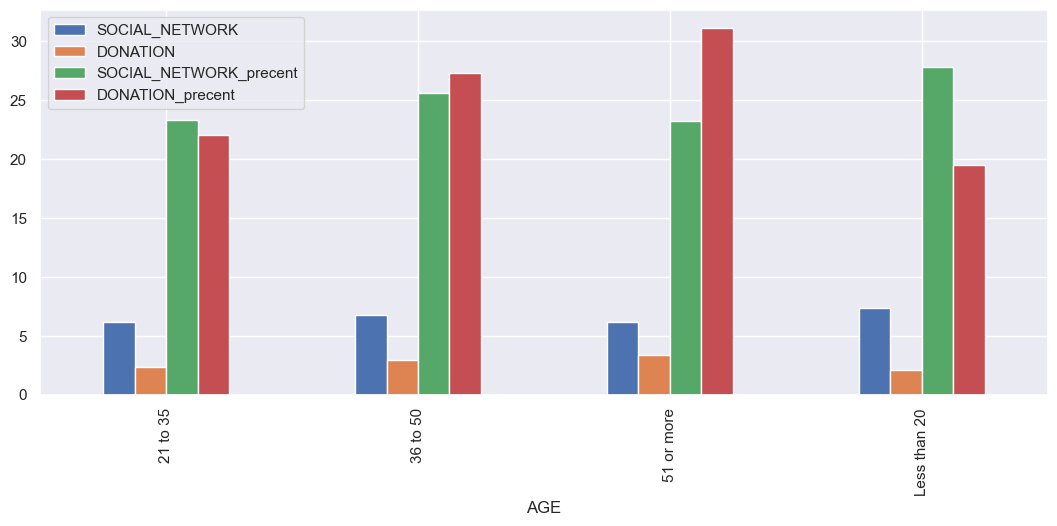

In [516]:
x = life_df.groupby(['AGE'])[['SOCIAL_NETWORK', 'DONATION']].mean()
y = x['SOCIAL_NETWORK']/x['SOCIAL_NETWORK'].sum() *100
z = x['DONATION']/x['DONATION'].sum() *100
x["SOCIAL_NETWORK_precent"] = y
x["DONATION_precent"] = z
x.plot.bar(figsize=(13,5))
plt.show()

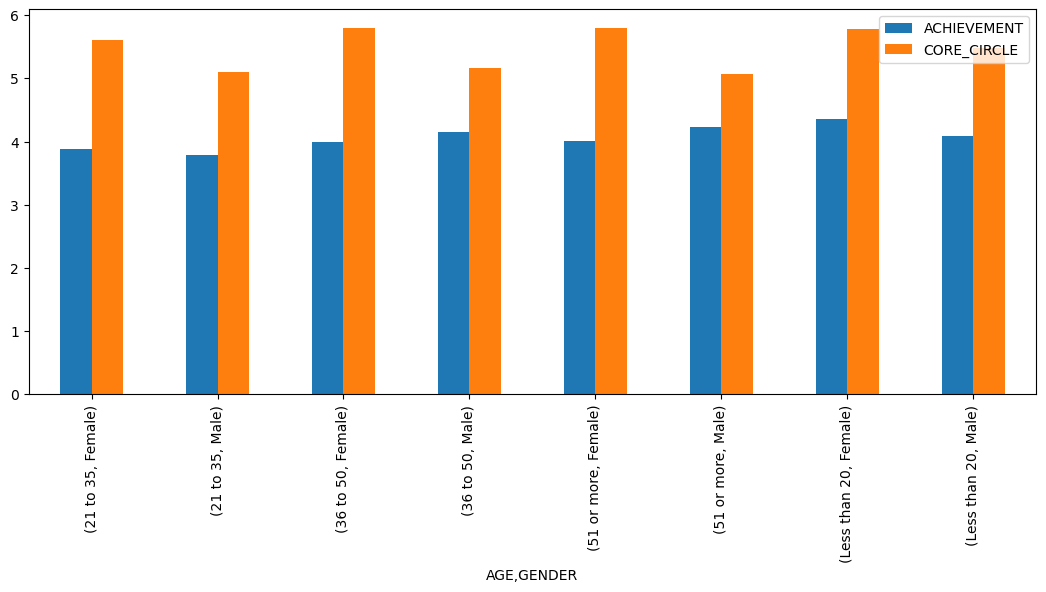

In [122]:
life_df.groupby(['AGE','GENDER'])[['ACHIEVEMENT',"CORE_CIRCLE"]].mean().plot.bar(figsize=(13,5))
plt.show()

In [301]:
life_df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [255]:
life_df['DAILY_STRESS'] = pd.to_numeric(life_df['DAILY_STRESS'], errors='coerce')

NameError: name 'DAILY_STRESS' is not defined

In [241]:
Numeric_columns = life_df[[
    'CORE_CIRCLE','SUPPORTING_OTHERS','SOCIAL_NETWORK','ACHIEVEMENT',
       'DONATION','BMI_RANGE','TODO_COMPLETED','DAILY_STEPS',
       'LIVE_VISION','SLEEP_HOURS','DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS','TIME_FOR_PASSION',
       'WEEKLY_MEDITATION','WORK_LIFE_BALANCE_SCORE']]

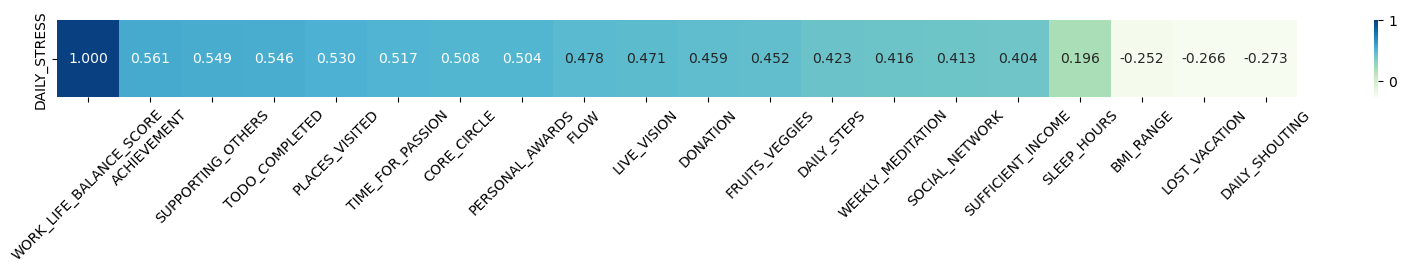

In [239]:
WLB_corr = Numeric_columns.corr().iloc[-1]
plt.figure(figsize=(20,1))
life_df = pd.DataFrame({cname: WLB_corr[WLB_corr.index==cname].iloc[0] for cname in WLB_corr.index}, index=['DAILY_STRESS'])
life_df.sort_values(axis=1, by='DAILY_STRESS', inplace=True, ascending=False)
life_df.drop(['DAILY_STRESS'], axis=1, inplace=True)
sns.heatmap(life_df, annot=True, fmt='0.3f', cmap='GnBu');
plt.xticks(rotation=45);

מסקנה שנייה****